### Задача - 2
#### Имя - Хурматулла  ----- Фамилия - Карими ------ Группа - 22.М07-мм

В этом файле я решил: Числа (2) со всеми подробностями.

In [1]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
datasets = pd.read_csv('heart.csv')
datasets.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Очистка данных & EDA

In [3]:
datasets.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
datasets.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


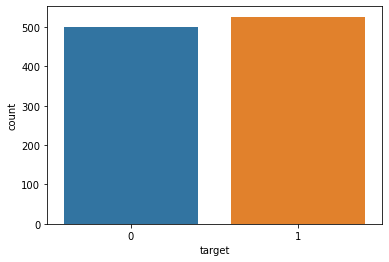

In [6]:
sns.countplot(x="target", data=datasets)
plt.show()

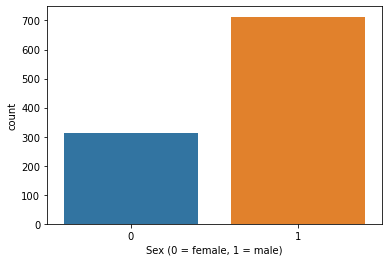

In [7]:
sns.countplot(x='sex', data=datasets)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [8]:
datasets.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


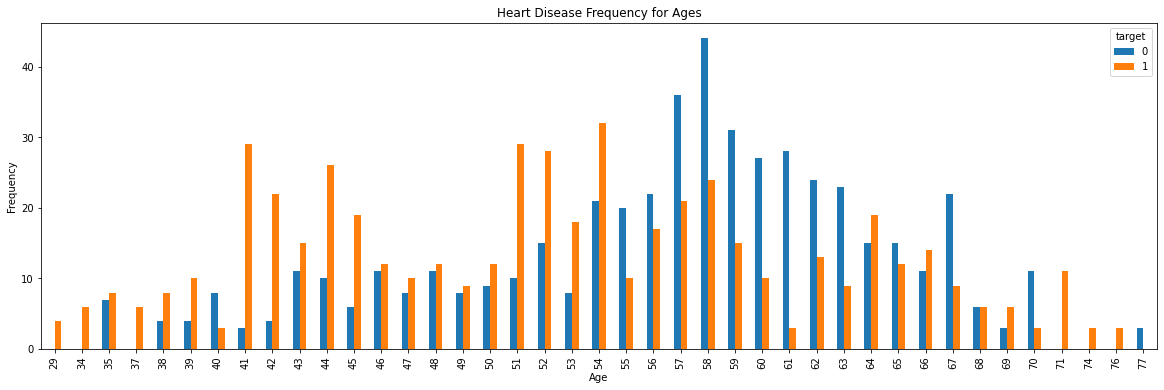

In [9]:
pd.crosstab(datasets.age,datasets.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

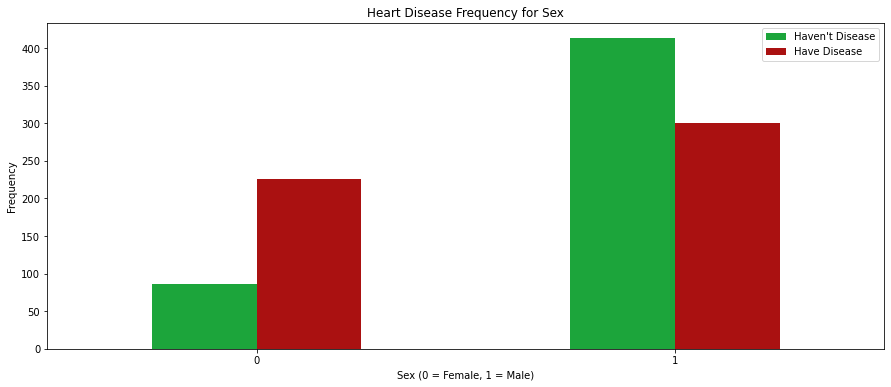

In [10]:
pd.crosstab(datasets.sex,datasets.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

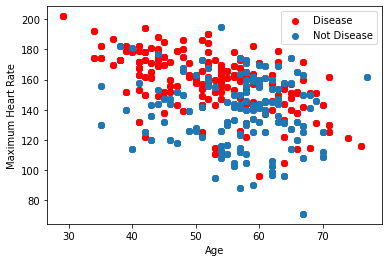

In [11]:
plt.scatter(x=datasets.age[datasets.target==1], y=datasets.thalach[(datasets.target==1)], c="red")
plt.scatter(x=datasets.age[datasets.target==0], y=datasets.thalach[(datasets.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

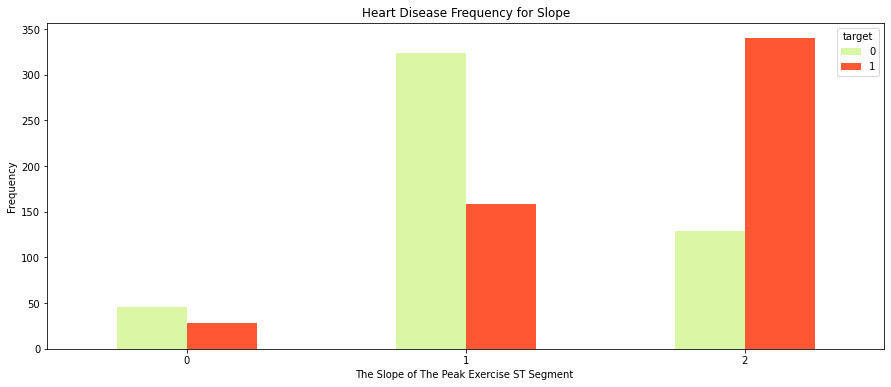

In [12]:
pd.crosstab(datasets.slope,datasets.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

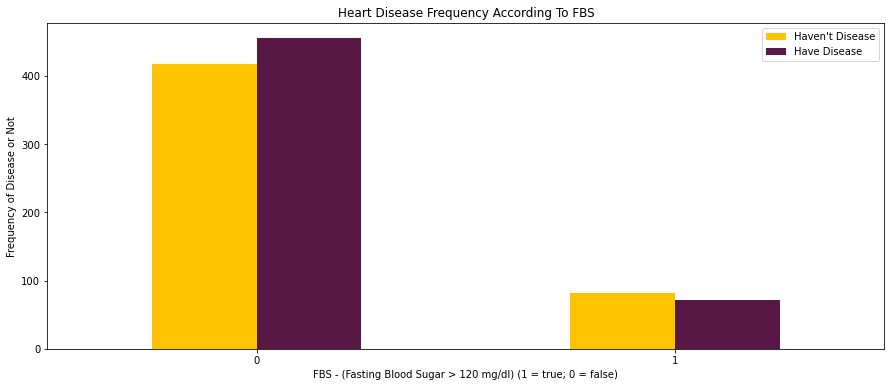

In [13]:
pd.crosstab(datasets.fbs,datasets.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

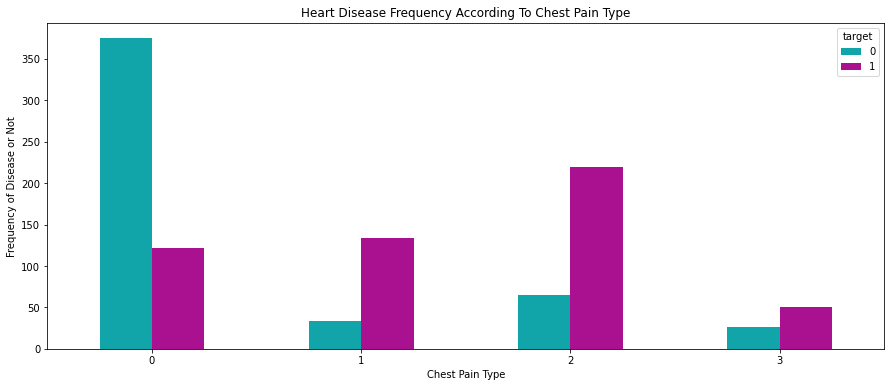

In [14]:
pd.crosstab(datasets.cp,datasets.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [15]:
datasets['age'].value_counts()

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

In [16]:
datasets['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [17]:
datasets['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [18]:
datasets['trestbps'].value_counts()

120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: trestbps, dtype: int64

In [19]:
datasets['chol'].value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64

In [20]:
datasets['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [21]:
datasets['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [22]:
datasets['thalach'].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

In [23]:
datasets['exang'].value_counts()

0    680
1    345
Name: exang, dtype: int64

In [24]:
datasets['oldpeak'].value_counts()

0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64

In [25]:
datasets['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [26]:
datasets['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [27]:
datasets['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [28]:
datasets['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<Figure size 2160x2160 with 0 Axes>

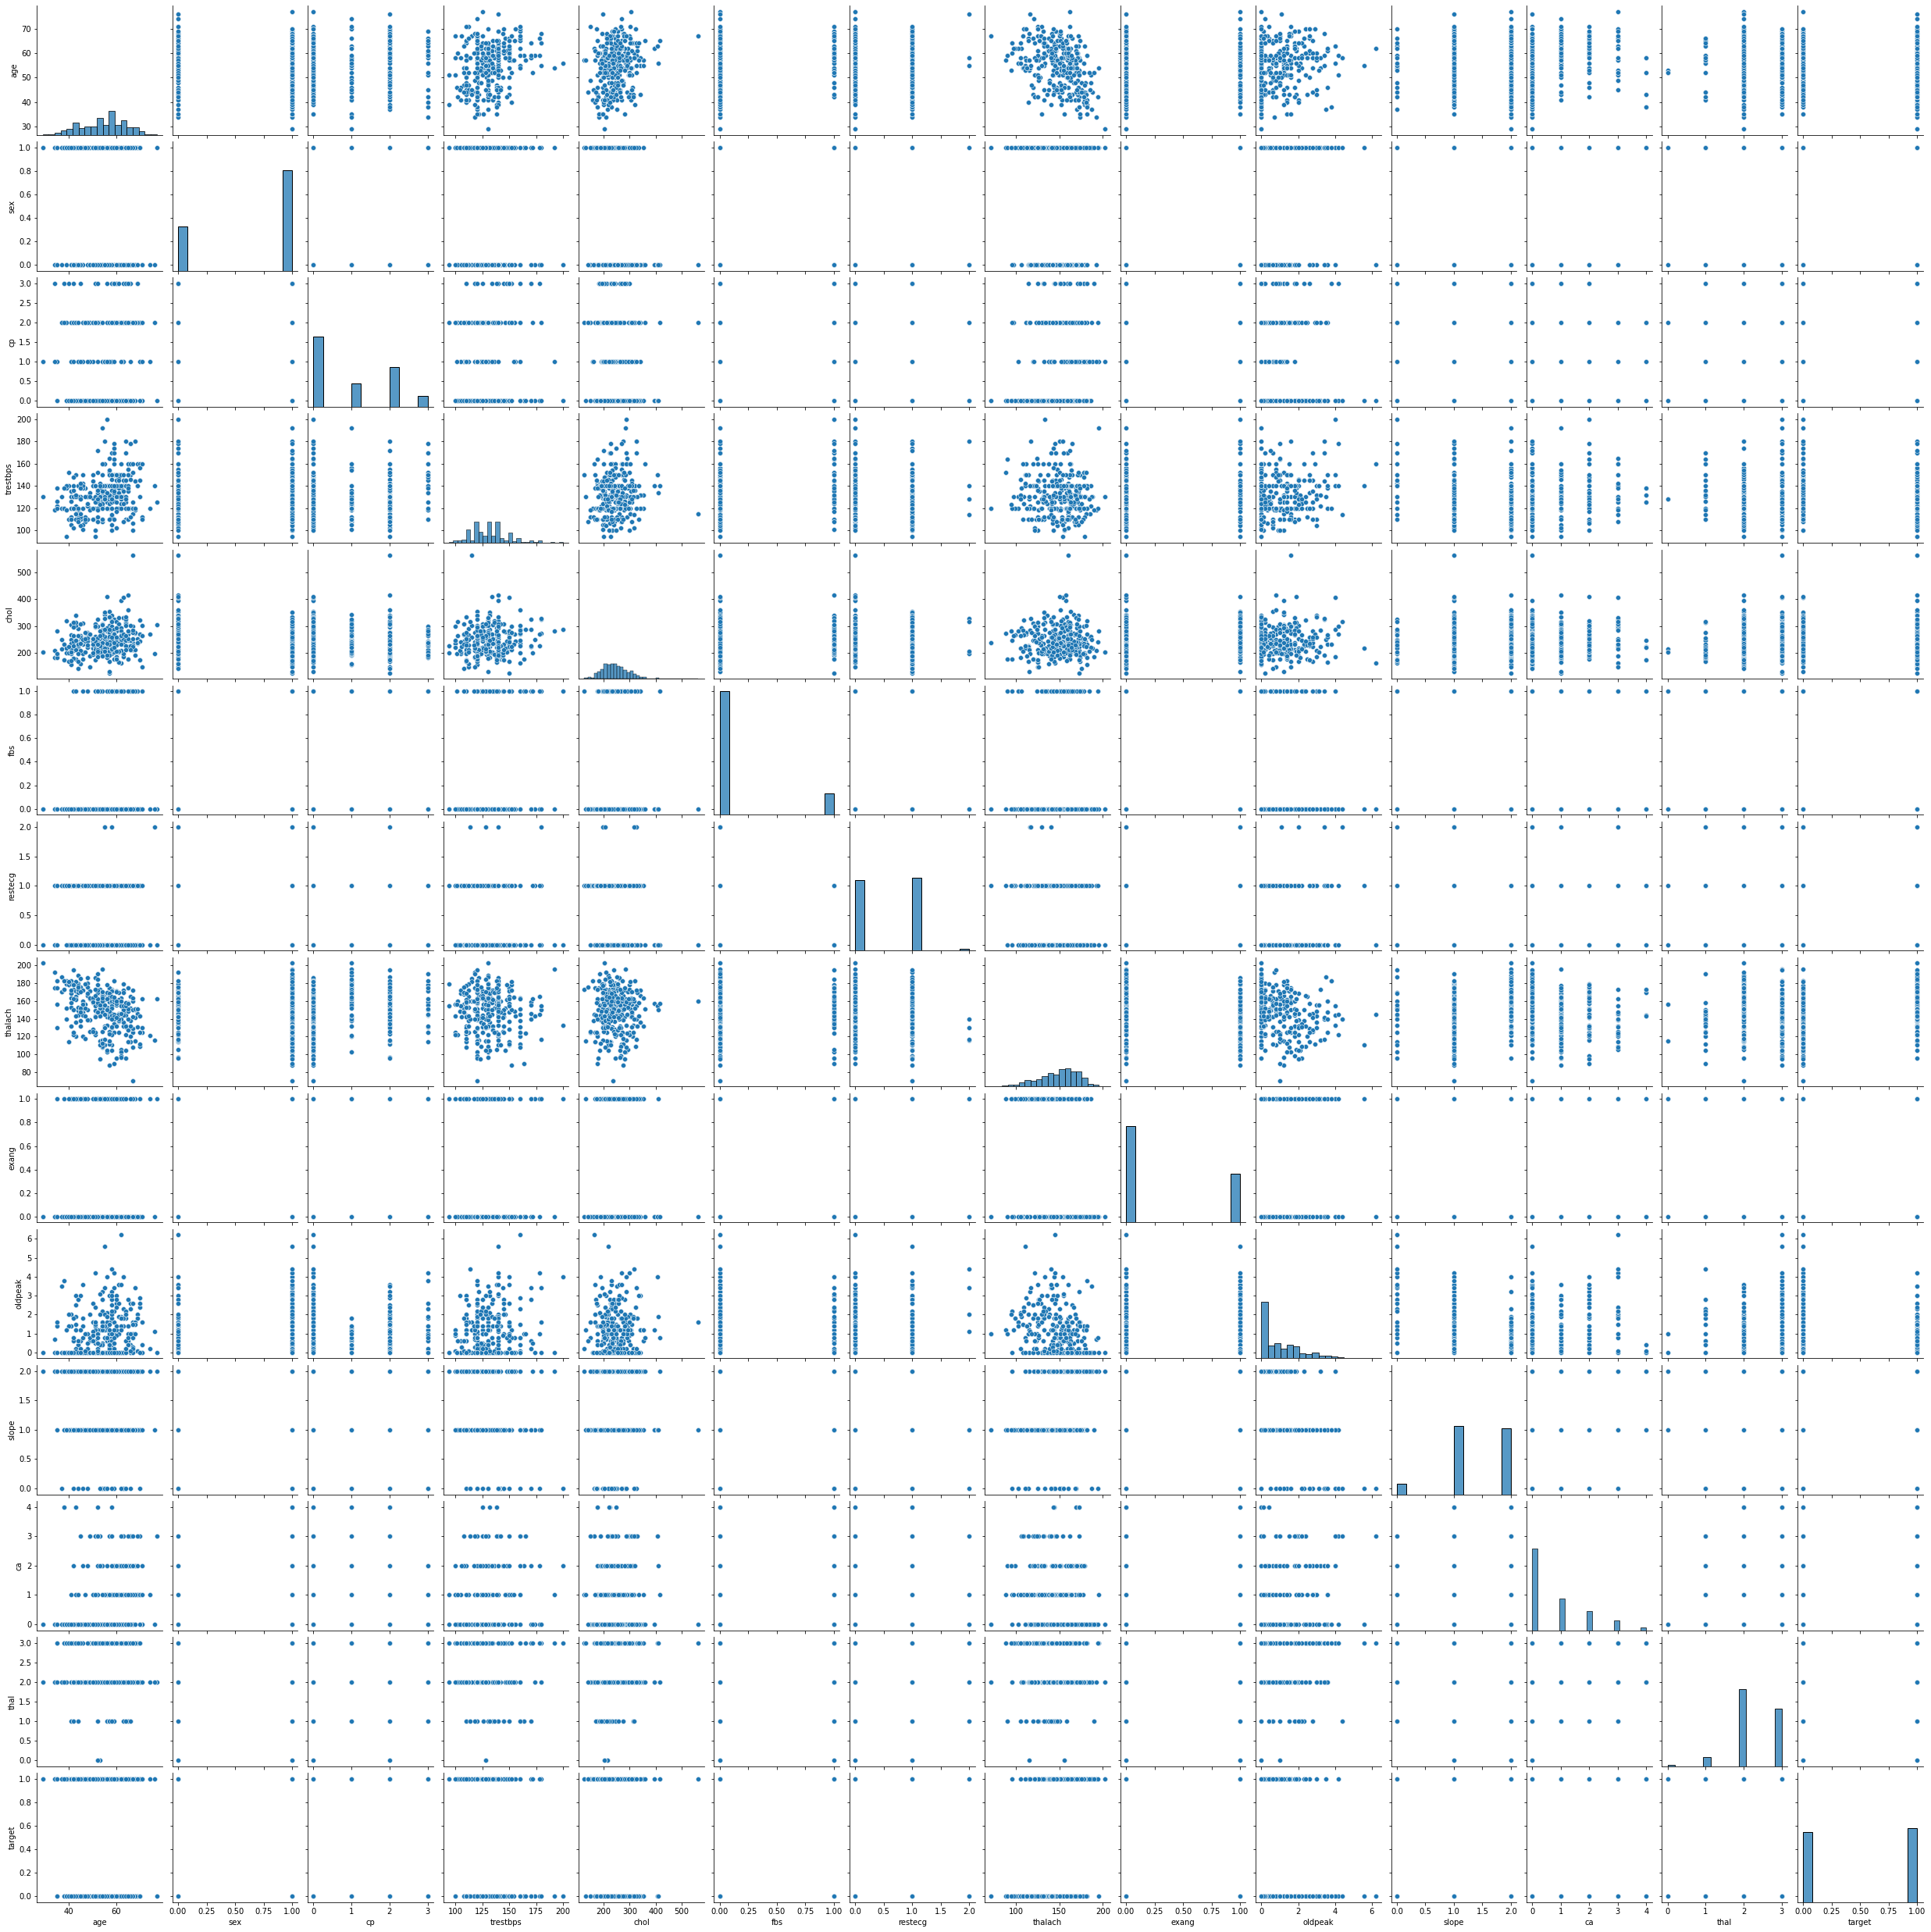

In [29]:
plt.figure(figsize = (30,30))
sns.pairplot(datasets)
plt.show()

In [30]:
numeric_columns = datasets.select_dtypes(include =['int64','float64'])
numeric_columns.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


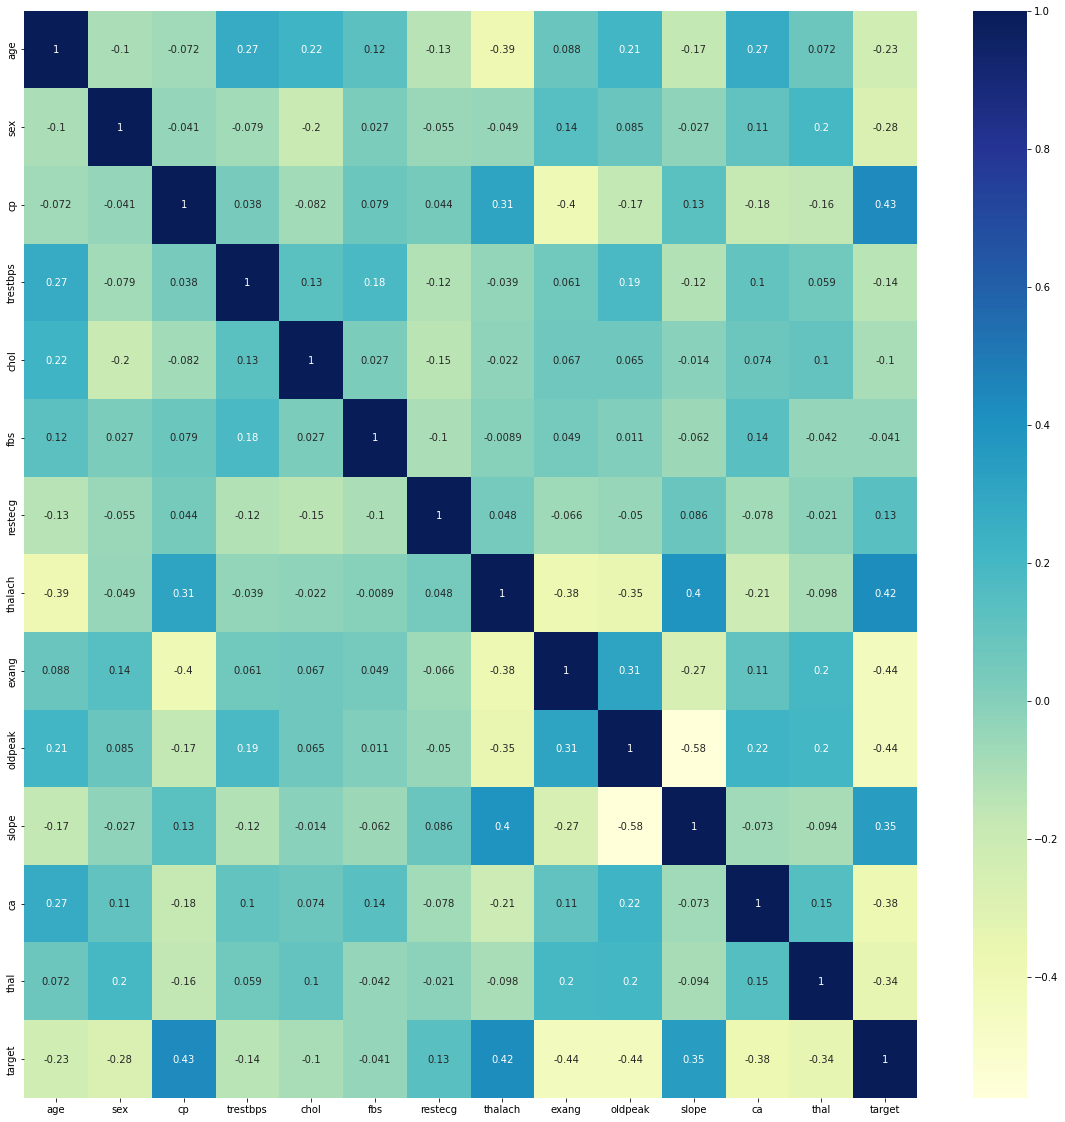

In [31]:
plt.figure(figsize = (20,20))
sns.heatmap(datasets.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

### Процесс записи функций

In [32]:
datasets = datasets.select_dtypes(include=['number']).copy()
datasets=pd.get_dummies(datasets,drop_first=True)

In [33]:
datasets.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
X = datasets.drop('target', axis = 1).values
Y = datasets['target'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=13)

In [36]:
X_train.shape

(820, 13)

In [37]:
y_train.shape

(820,)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model = Ridge()  # выбранная модель
model.fit(X_train, y_train)

Ridge()

### Перекрестная проверка

In [40]:
simple_cv = cross_val_score(model, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
print("Cross Validation of train score: ", (-simple_cv))

Cross Validation of train score:  [0.35599414 0.3447801  0.3398577  0.3532286 ]


In [41]:
cross_test = cross_val_predict(model, X_test, y_test)

In [42]:
root_mse_test_score = cross_val_score(model, X_test, y_test, cv=4, scoring="neg_root_mean_squared_error")
print("Cross Validation test score:", (-root_mse_test_score))

Cross Validation test score: [0.36443936 0.42974805 0.42774409 0.39357948]


### Гиперпараметрический процесс

In [43]:
alpha_grid = np.logspace(-32,2,30)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=4)
searcher.fit(X_train, y_train)

# plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
# plt.xscale("log")
# plt.xlabel("alpha")
# plt.ylabel("CV score")

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-32, 1.48735211e-31, 2.21221629e-30, 3.29034456e-29,
       4.89390092e-28, 7.27895384e-27, 1.08263673e-25, 1.61026203e-24,
       2.39502662e-23, 3.56224789e-22, 5.29831691e-21, 7.88046282e-20,
       1.17210230e-18, 1.74332882e-17, 2.59294380e-16, 3.85662042e-15,
       5.73615251e-14, 8.53167852e-13, 1.26896100e-11, 1.88739182e-10,
       2.80721620e-09, 4.17531894e-08, 6.21016942e-07, 9.23670857e-06,
       1.37382380e-04, 2.04335972e-03, 3.03919538e-02, 4.52035366e-01,
       6.72335754e+00, 1.00000000e+02])}],
             scoring='neg_root_mean_squared_error')

In [44]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 100.0000


In [45]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Support Vector Machine",SVC()))
models.append(("K Nearest Neighbors",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("Random Forest Regression",RandomForestClassifier()))

scoring='accuracy'

In [46]:
result=[]
names=[]

In [47]:
for name,model in models:
    #print(model)
    kfold=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=12)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

Logistic Regression 0.848780 0.041892
Decision Tree 0.990732 0.014948
Support Vector Machine 0.917805 0.033691
K Nearest Neighbors 0.833659 0.038623
Naive Bayes 0.833659 0.046069
Random Forest Regression 0.992195 0.013745


In [48]:
model_accuracies = {}

### Логистическая регрессия

Train/Test split results:
LogisticRegression accuracy is 0.862
LogisticRegression log_loss is 0.336
LogisticRegression auc is 0.932


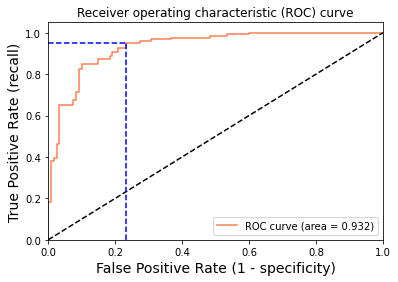

In [49]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_logregr, X_test_logregr, y_train_logregr, y_test_logregr = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) # уже с отобранными призаками

scaler_logregr = StandardScaler()

X_train_scaled_logregr = scaler_logregr.fit_transform(X_train_logregr)

X_test_scaled_logregr = scaler_logregr.transform(X_test_logregr)

logreg = LogisticRegression()
logreg.fit(X_train_scaled_logregr, y_train_logregr)
y_pred = logreg.predict(X_test_scaled_logregr)
y_pred_proba = logreg.predict_proba(X_test_scaled_logregr)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_logregr, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_logregr, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_logregr, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Перекрестная проверка логистической регрессии

In [50]:
logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.857
LogisticRegression average log_loss is 0.361
LogisticRegression average auc is 0.920


### Гиперпараметр логистической регрессии

In [51]:
C = np.arange(0.5, 3, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()
std_scale = StandardScaler()

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=kfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)
results = log_clf.cv_results_
best_param = str(log_clf.best_params_)
best_score = log_clf.best_score_
model_accuracies['Logistic Regression'] = log_clf.score(X_test, y_test)
print("best params: ", best_param)
print('best score:', best_score)
print('Accuracy of Logistic Regression:', model_accuracies['Logistic Regression'])

best params:  {'clf__C': 1.9999999999999996}
best score: 0.8492682926829269
Accuracy of Logistic Regression: 0.8146341463414634


### Классификация машин с опорным вектором

Train/Test split results:
LogisticRegression accuracy is 0.911
LogisticRegression log_loss is 0.251
LogisticRegression auc is 0.964


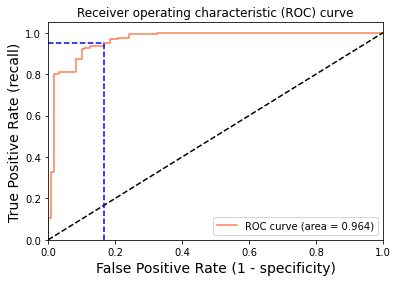

In [52]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_svm = StandardScaler()

X_train_scaled_svm = scaler_svm.fit_transform(X_train_svm)

X_test_scaled_svm = scaler_svm.transform(X_test_svm)

svm = SVC()
svm.probability = True
svm.fit(X_train_scaled_svm, y_train_svm)
y_pred = svm.predict(X_test_scaled_svm)
y_pred_proba = svm.predict_proba(X_test_scaled_svm)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_svm, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_svm, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_svm, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Пользовательская конфигурация с гиперпараметром с помощью SVM

In [53]:
def svm_sgd(X_train, y_train):

    w = np.zeros(len(X_train[0]))
    learning_rate = 0.001
    epochs = 100

    for epoch in range(1,epochs):
        for i, x in enumerate(X_train):
            if (y_train[i]*np.dot(X[i], w)) < 1:
                w = w + learning_rate * ( (X_train[i] * y_train[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + learning_rate * (-2  *(1/epoch)* w)

    return w

w = svm_sgd(X_train,y_train)
print(w)

[-2.72715355 -2.34248242  4.02044769 -1.6853163  -0.85985847 -0.79619295
  1.33953874  3.83197643 -3.82503814 -3.54409806  2.722333   -4.22797751
 -2.78749391]


### Перекрестная проверка машины опорных векторов

In [54]:
svm = SVC()
scores_accuracy = cross_val_score(svm, X_train_scaled_svm, y_train_svm, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(svm, X_train_scaled_svm, y_train_svm, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(svm, X_train_scaled_svm, y_train_svm, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(svm.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(svm.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(svm.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
SVC average accuracy is 0.909
SVC average log_loss is nan
SVC average auc is 0.953


### Гиперпараметр машины опорных векторов

In [55]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

cv = StratifiedKFold(10)
svm = SVC(random_state=11)
grid_svm = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
grid_svm.fit(X_train, y_train)
model_accuracies['SVC'] = grid_svm.score(X_test, y_test)

print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
print("test score:", model_accuracies['SVC'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

### K Ближайший сосед

Train/Test split results:
KNeighborsClassifier accuracy is 0.837
KNeighborsClassifier log_loss is 0.542
KNeighborsClassifier auc is 0.938


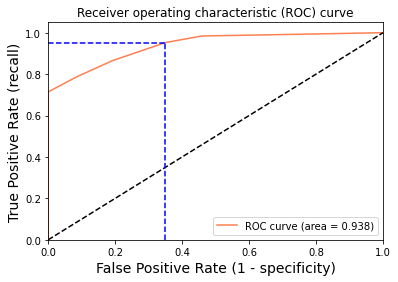

In [56]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_knn = StandardScaler()

X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)

X_test_scaled_knn = scaler_knn.transform(X_test_knn)

knn = KNeighborsClassifier()
# svm.probability = True
knn.fit(X_train_scaled_knn, y_train_knn)
y_pred = knn.predict(X_test_scaled_knn)
y_pred_proba = knn.predict_proba(X_test_scaled_knn)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_knn, y_pred_proba)
print('Train/Test split results:')
print(knn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_knn, y_pred))
print(knn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_knn, y_pred_proba))
print(knn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### K Перекрестная проверка ближайшего соседа

In [57]:
knn = KNeighborsClassifier()
scores_accuracy = cross_val_score(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(knn.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(knn.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(knn.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
KNeighborsClassifier average accuracy is 0.855
KNeighborsClassifier average log_loss is 0.795
KNeighborsClassifier average auc is 0.930


### K Гиперпараметр ближайшего соседа

In [58]:
n_neighbors = np.arange(1, 11, 2) # n_neighbors means k
weights = ['uniform', 'distance'] # weight of each neighbor

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier() 
std_scale = StandardScaler()
knn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=kfold,
              scoring=scoring,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)
results = knn_clf.cv_results_

print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
model_accuracies['KNN'] = knn_clf.score(X_test, y_test)
print("test score:", model_accuracies['KNN'])

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])
best params: {'clf__n_neighbors': 9, 'clf__weights': 'distance'}
best score: 0.9917073170731707
test score: 1.0


### Наивный Байес

Train/Test split results:
GaussianNB accuracy is 0.833
GaussianNB log_loss is 0.467
GaussianNB auc is 0.914


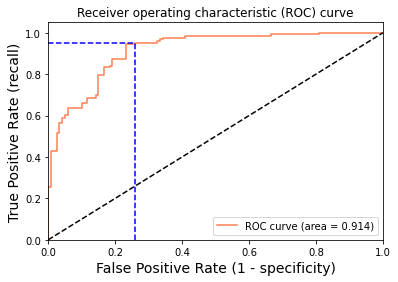

In [59]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_nb = StandardScaler()

X_train_scaled_nb = scaler_nb.fit_transform(X_train_nb)

X_test_scaled_nb = scaler_nb.transform(X_test_nb)

nb = GaussianNB()

nb.fit(X_train_scaled_nb, y_train_nb)
y_pred = nb.predict(X_test_scaled_nb)
y_pred_proba = nb.predict_proba(X_test_scaled_nb)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_nb, y_pred_proba)
print('Train/Test split results:')
print(nb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_nb, y_pred))
print(nb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_nb, y_pred_proba))
print(nb.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Наивная Байесовская перекрестная проверка

In [60]:
nb = GaussianNB()
scores_accuracy = cross_val_score(nb, X_train_scaled_nb, y_train_nb, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(nb, X_train_scaled_nb, y_train_nb, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(nb, X_train_scaled_knn, y_train_nb, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(nb.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(nb.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(nb.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
GaussianNB average accuracy is 0.828
GaussianNB average log_loss is 0.502
GaussianNB average auc is 0.913


### Наивный байесовский гиперпараметр

In [61]:
priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100) # portion of the largest variance of all features that is added to variances for calculation stability

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()  

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)
results = nb_clf.cv_results_

print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
model_accuracies['Naive Bayes'] = nb_clf.score(X_test, y_test)
print("test score:", model_accuracies['Naive Bayes'])

best params: {'clf__priors': [0.62, 0.38], 'clf__var_smoothing': 1.0}
best score: 0.8473170731707317
test score: 0.8048780487804879


### Дерево решений

Train/Test split results:
DecisionTreeClassifier accuracy is 0.976
DecisionTreeClassifier log_loss is 0.842
DecisionTreeClassifier auc is 0.976


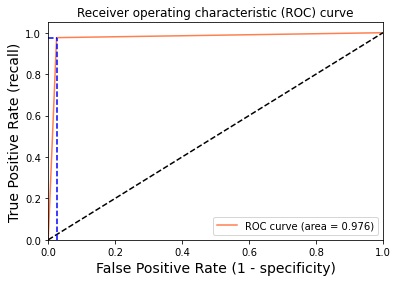

In [62]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_dt = StandardScaler()

X_train_scaled_dt = scaler_dt.fit_transform(X_train_dt)

X_test_scaled_dt = scaler_dt.transform(X_test_dt)

dt = DecisionTreeClassifier()

dt.fit(X_train_scaled_dt, y_train_dt)
y_pred = dt.predict(X_test_scaled_dt)
y_pred_proba = dt.predict_proba(X_test_scaled_dt)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_dt, y_pred_proba)
print('Train/Test split results:')
print(dt.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_dt, y_pred))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_dt, y_pred_proba))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Перекрестная проверка дерева решений

In [63]:
dt = DecisionTreeClassifier()
scores_accuracy = cross_val_score(dt, X_train_scaled_dt, y_train_dt, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(dt, X_train_scaled_dt, y_train_dt, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(dt, X_train_scaled_dt, y_train_dt, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(dt.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(dt.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(dt.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.937
DecisionTreeClassifier average log_loss is 1.746
DecisionTreeClassifier average auc is 0.948


### Гиперпараметр дерева решений

In [64]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
model_accuracies['Decision Tree'] = grid_search_cv.score(X_test, y_test)

print("best score: ", grid_search_cv.best_score_)
print("best param: ", grid_search_cv.best_params_)
print("test score:", model_accuracies['Decision Tree'])

Fitting 3 folds for each of 294 candidates, totalling 882 fits
best score:  0.9487580545974706
best param:  {'max_leaf_nodes': 50, 'min_samples_split': 2}
test score: 0.9707317073170731


### Регрессия случайного леса

Train/Test split results:
Random Forest Classification accuracy:  0.9796747967479674


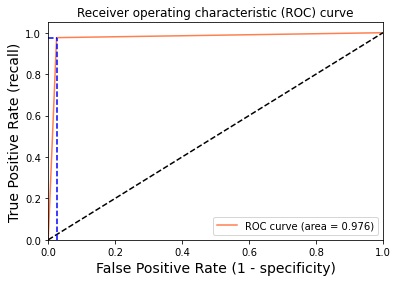

In [65]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from collections import Counter
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions
    
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=10)
clf.fit(X_train_rf, y_train_rf)
predictions = clf.predict(X_test_rf)

acc =  accuracy(y_test_rf, predictions)
[fpr, tpr, thr] = roc_curve(y_test_rf, y_pred_proba)
print('Train/Test split results:')
print("Random Forest Classification accuracy: ", acc)

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Перекрестная проверка регрессии случайного леса

In [66]:
rfc = RandomForestClassifier()
scores_accuracy = cross_val_score(rfc, X_train_rf, y_train_rf, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(rfc, X_train_rf, y_train_rf, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(rfc, X_train_rf, y_train_rf, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(rfc.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(rfc.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(rfc.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.969
RandomForestClassifier average log_loss is 0.201
RandomForestClassifier average auc is 0.993


### Гиперпараметры регрессии случайного леса

In [67]:
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train,y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[10,20,30,40,50,60,70],
               'max_depth': [3,4,5,7],
               'criterion':['entropy'],
               'min_samples_split':[5,4,6,7,8],
               'max_features':['auto', 'sqrt', 'log2']
               }]
grid_search = GridSearchCV(estimator= classifier,
                           param_grid= parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = 10)

grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
model_accuracies['Random Forest Regression'] = grid_search.score(X_test, y_test)
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)
print("Accuracy of Random Forest Regression", model_accuracies['Random Forest Regression'])

Best Accuracy: 0.976829268292683
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 40}
Accuracy of Random Forest Regression 0.9463414634146341


### Результаты

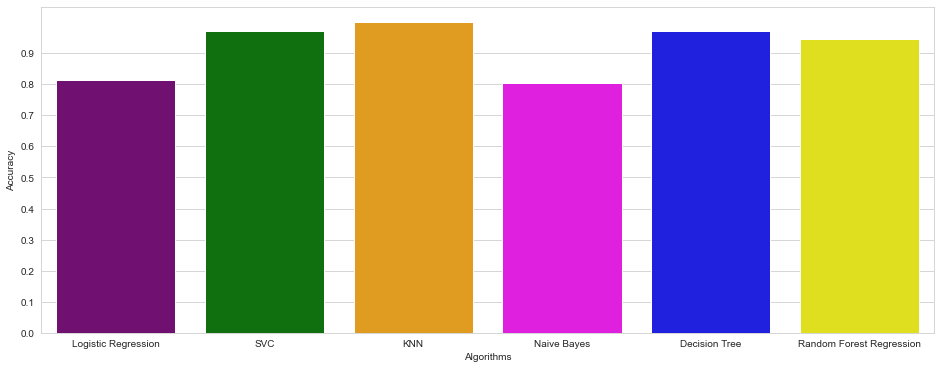

In [68]:
colors = ["purple", "green", "orange", "magenta", "blue","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

In [69]:
# Logisic Regression confusion matrix
LogisticRegress= LogisticRegression()
LogisticRegress.fit(X_train,y_train)
pred=LogisticRegress.predict(X_test)
lr_cm = confusion_matrix(y_test,pred)
# SVM confusion matrix
svc= SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
svm_cm = confusion_matrix(y_test,pred)
# KNN Confusion Matrix
Compare_Knn= KNeighborsClassifier()
Compare_Knn.fit(X_train,y_train)
pred=Compare_Knn.predict(X_test)
knn_cm = confusion_matrix(y_test,pred)
# Naive Bayes Confusion Matrix
Compare_Gaussian= GaussianNB()
Compare_Gaussian.fit(X_train,y_train)
pred=Compare_Gaussian.predict(X_test)
nb_cm = confusion_matrix(y_test,pred)
# Decision Tree Confusion Matrix
Compare_DecisionTree= DecisionTreeClassifier()
Compare_DecisionTree.fit(X_train,y_train)
pred=Compare_DecisionTree.predict(X_test)
dt_cm = confusion_matrix(y_test,pred)
# Random Forest Confusion Matrix
Compare_RandomForest= RandomForest()
Compare_RandomForest.fit(X_train,y_train)
pred=Compare_RandomForest.predict(X_test)
rfc_cm = confusion_matrix(y_test,pred)

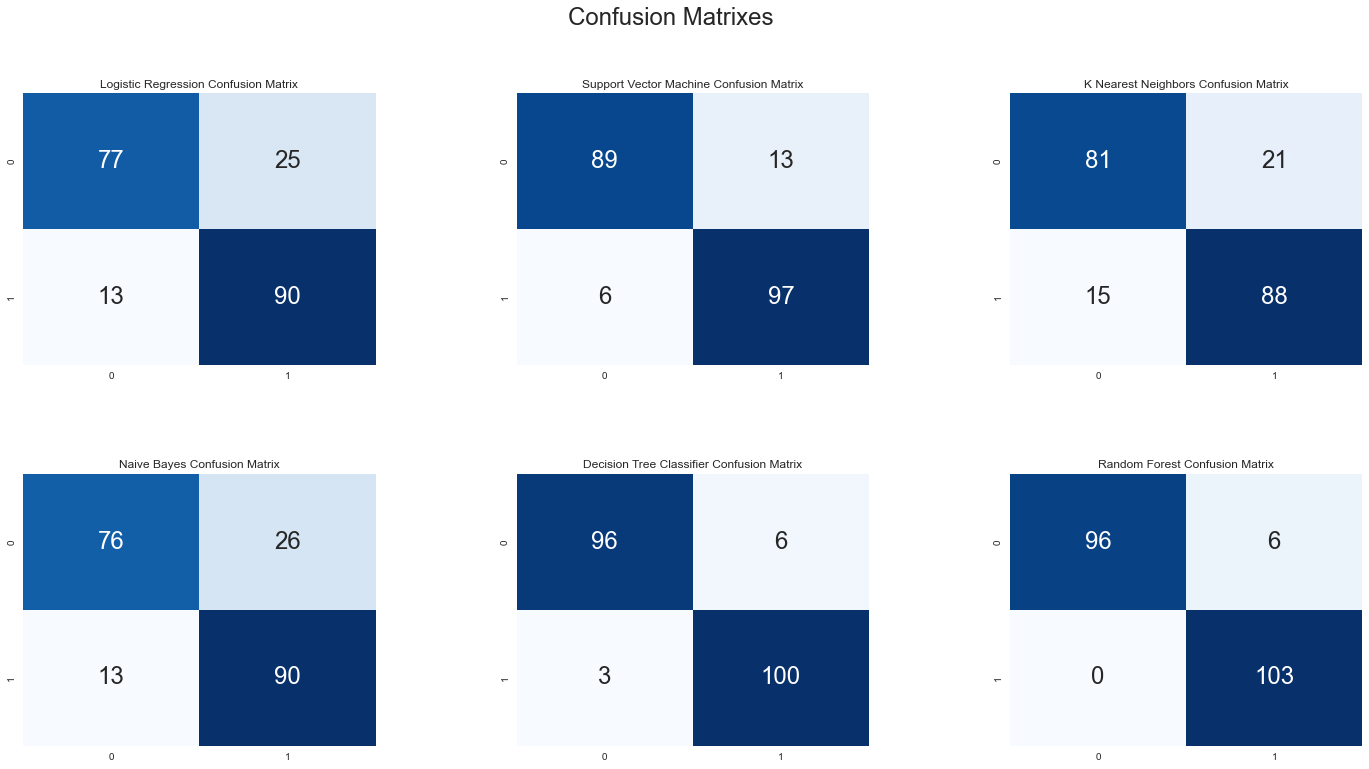

In [70]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(svm_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(nb_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(dt_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rfc_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()